### **Customer Segmentation using KMeans and Principal Component Analysis(PCA)**

**Segmentation dataset**

The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values.

**Variable	Description**	 		

ID	-	Shows a unique identificator of a customer.	

Sex	 -	Biological sex (gender) of a customer. 

Marital status -	Marital status of a customer.			
				
Age	 -	The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset

Education	-	Level of education of the customer			

Income	-	Real	Self-reported annual income in US dollars of the customer.		

Occupation  -	Category of occupation of the customer.				

Settlement size -	The size of the city that the customer lives in.	

**Import packages, libraries and dataset**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #Override the default matplotlib look with the seaborn one.

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import scipy
# Dendrogram -> tree like, hierarchical representation of points
# Linkage -> specific employed methods
from scipy.cluster.hierarchy import dendrogram, linkage

#Pickle is a module used to turn Python objects into string streams
import pickle

In [ ]:
df_segmentation=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Segmentation/Segmentation Kmeans PCA 1/segmentation data.csv', index_col=0)

**Explore data**

In [ ]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [ ]:
# Descriptive statistics for numerical variables
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


**Correlation estimate**

In [ ]:
# Pearson correlation - linear dependency between variables

df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


**Visualize data**

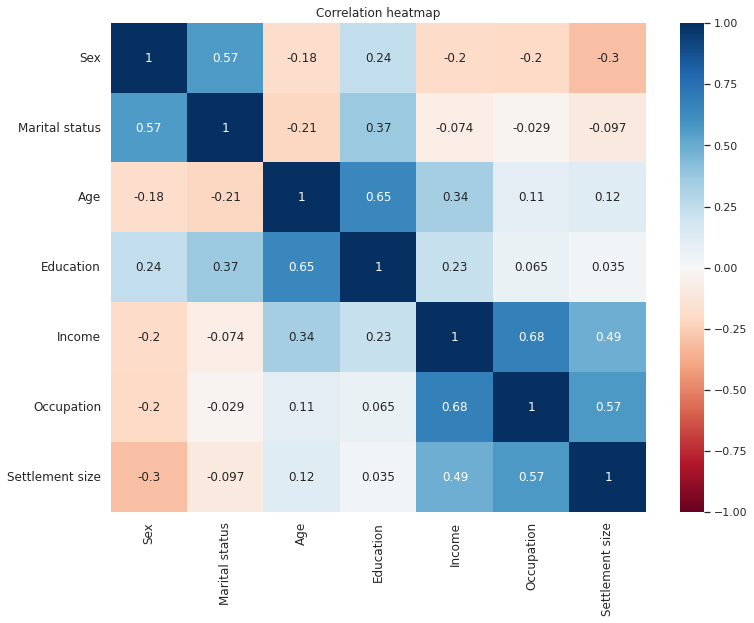

In [ ]:
plt.figure(figsize=(12,9))
s=sns.heatmap(df_segmentation.corr(), annot=True, cmap='RdBu',
              vmin=-1,
              vmax=1)
# Labels
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Correlation heatmap')
plt.show()

Text(0.5, 1.0, 'Visualization of raw data')

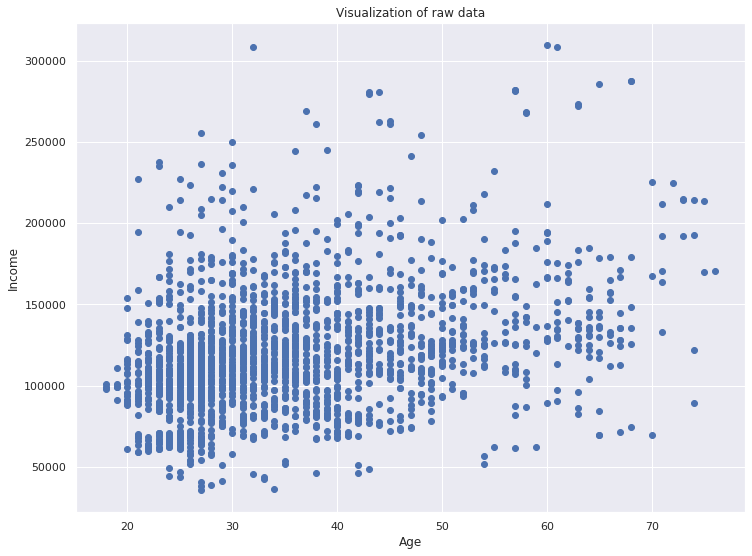

In [ ]:
# Scatterplot

plt.figure(figsize=(12,9))
# Use column 3 and 5
plt.scatter(df_segmentation.iloc[:,2], df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

**Standardize data**

In [ ]:
scaler=StandardScaler()
segmentation_std=scaler.fit_transform(df_segmentation)

### **Hierarchical Clustering**

In [ ]:
# Linkage will return a linkage matrix.
# Hier_clust contains the clustering solution.

hier_clust=linkage(segmentation_std, method='ward')

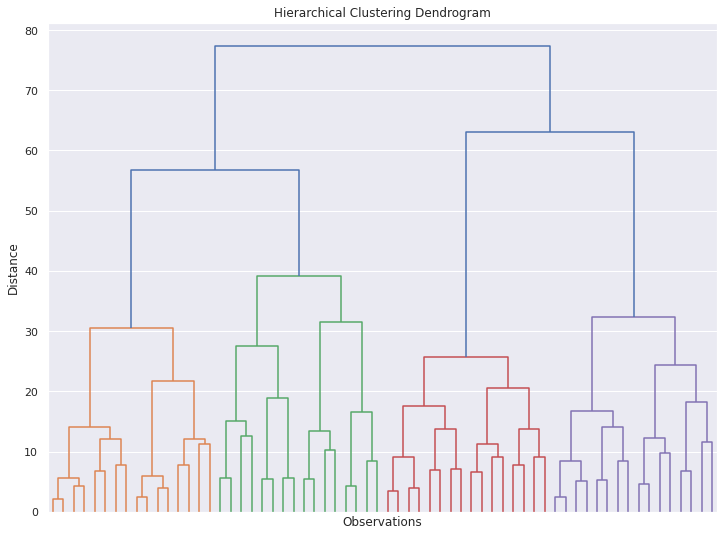

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode='level',
           p=5,
           show_leaf_counts=False,
           no_labels=True)
plt.show()

We need to find a horizontal line on the dendogram to cut. All the leaves connected to the line until the line will belong to another cluster.

Rule of thumb: we find the longest vertical line unintercepted by a horizontal line from the dendrogram. This is where we should make the cut.

### **K-Means Clustering**

In [ ]:
# Initialize WCSS

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'K-means Clustering')

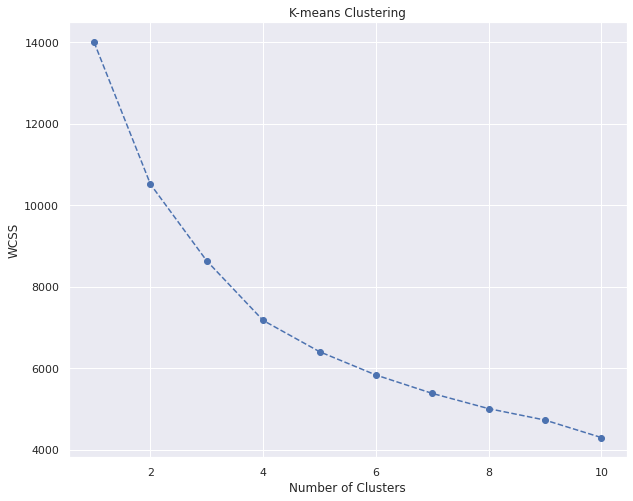

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')

In [ ]:
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=42)

In [ ]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

**Results**

In [ ]:
# Make a copy of the segmentation data
df_segm_kmeans=df_segmentation.copy()

# Add a new column with the predicted clusters for each observation.
df_segm_kmeans['Segment K-means']=kmeans.labels_

In [ ]:
# Obtain the means for the clusters
df_segm_analysis=df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


See the size of the clusters and their proportions compared to the dataset.

In [ ]:
# Create a new column representing number of observations.

df_segm_analysis['N Obs']=df_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()

In [ ]:
# Proportion of clusters

df_segm_analysis['Prop Obs']=df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()

In [ ]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


Rename the clusters.

In [ ]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


Plot the raw data

In [ ]:
# Use map function to label clusters

df_segm_kmeans['Labels']=df_segm_kmeans['Segment K-means'].map({0:'well-off',
                                                                1:'fewer opportunities',
                                                                2:'standard',
                                                                3:'career focused'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


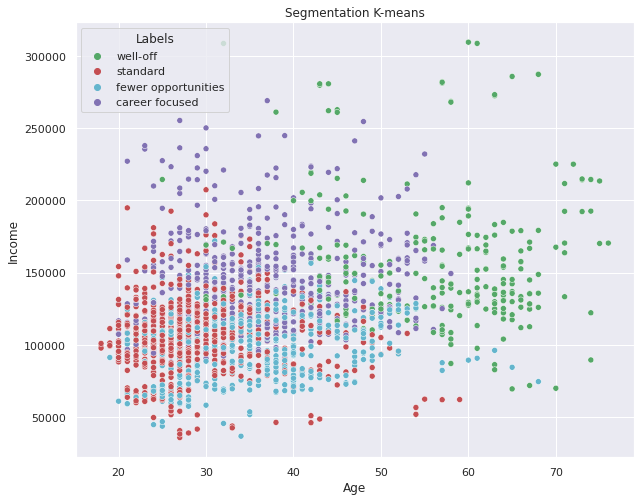

In [ ]:
# Initialize the x and y axes for convenience.
x_axis=df_segm_kmeans['Age']
y_axis=df_segm_kmeans['Income']

plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df_segm_kmeans['Labels'], palette=['g','r','c','m'] )
plt.title('Segmentation K-means')
plt.show()

### **Pricipal Component Analysis**

In [ ]:
pca=PCA()

In [ ]:
# Apply the fit method to the PCA variable with the standardized data as an argument.
pca.fit(segmentation_std)

PCA()

PCA creates as many components as there are features. This components are arranged in the order of their importance. Importance reflects how much of the variance of the data is explained by each component.

In [ ]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Find a subset of components, while preserving variance.

Text(0, 0.5, 'Cumulative Explained variance')

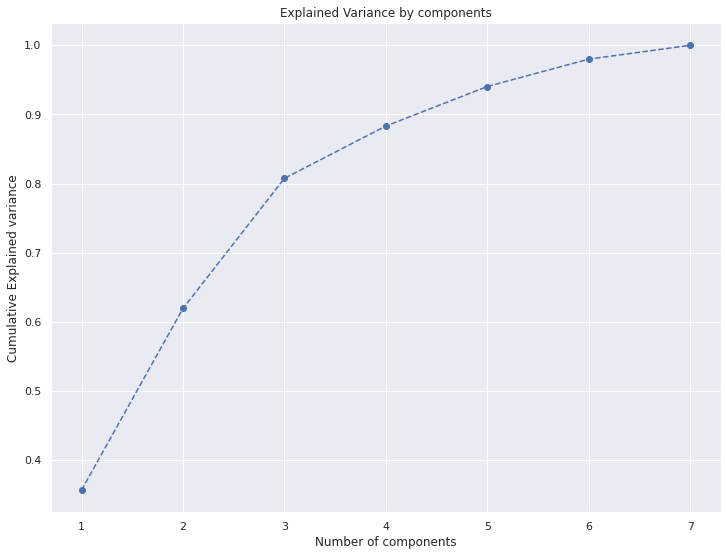

In [ ]:
plt.figure(figsize=(12,9))

# Plot nb of components on the x axis and the cumulative variance on the y axis.
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance')

Rule of thumb: it's recommended to keep about 80% of the variance.

In [ ]:
pca=PCA(n_components=3)

In [ ]:
pca.fit(segmentation_std)

PCA(n_components=3)

# **PCA results**

In [ ]:
 # We will get a 3 (components)  by 7 (original features) array
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

Loadings represent the correlation between an original variable and a component.

In [ ]:
df_pca_comp=pd.DataFrame(data=pca.components_,
                        columns=df_segmentation.columns.values,
                        index=['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


Plot a heatmap

([<matplotlib.axis.YTick at 0x7f0465fd9650>,
 [Text(0, 0.5, 'Component 1'),
  Text(0, 1.5, 'Component 2'),
  Text(0, 2.5, 'Component 3')])

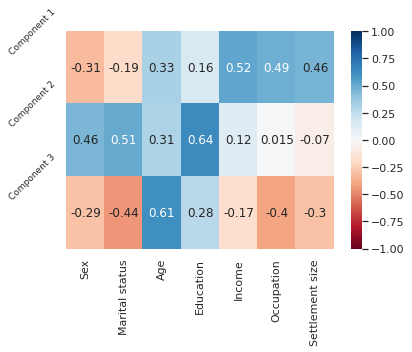

In [ ]:
sns.heatmap(df_pca_comp,
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True)
plt.yticks([0,1,2],
           ['Component 1', 'Component 2','Component 3'],
           rotation=45,
           fontsize=9)

In [ ]:
# Obtain the PCA scores. The component scores are standardized by definition.
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [ ]:
scores_pca=pca.transform(segmentation_std)

### **K-Means clustering with PCA**

In [ ]:
# Within Cluster sum of squares
wcss=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

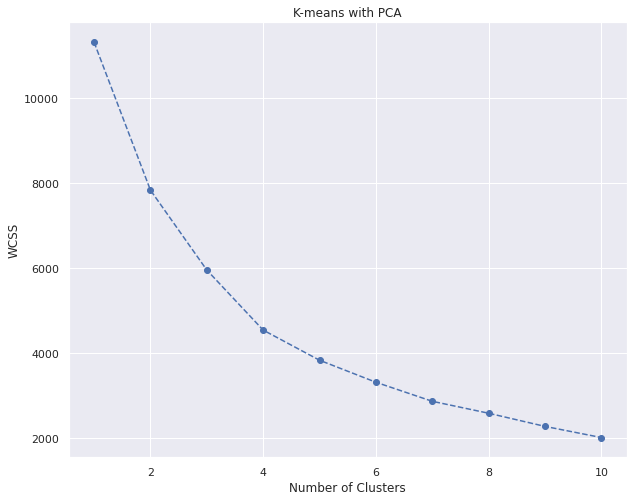

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA')
plt.show()

Use the Elbow method to determine the number of clusters.

In [ ]:
# Create a Kmeans PCA model with 4 clusters
kmeans_pca=KMeans(n_clusters=4, init='k-means++', random_state=42)

In [ ]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

### **K-Means clustering with PCA Results**


In [ ]:
# Create a new dataframe, adding the values of the separate components to the segmentation dataset.
df_segm_pca_kmeans=pd.concat([df_segmentation.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
# Add label
df_segm_pca_kmeans.columns.values[-3:]=['Component 1', 'Component 2', 'Component 3']
# Append kmeans pca labels to the new dataframe
df_segm_pca_kmeans['Segment Kmeans PCA']=kmeans_pca.labels_

In [ ]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment Kmeans PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [ ]:
# Calculate Mean values of each feature by clusters using group by.

df_segm_pca_kmeans_freq=df_segm_pca_kmeans.groupby(['Segment Kmeans PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment Kmeans PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


See how many observations belong in each cluster.

In [ ]:
df_segm_pca_kmeans_freq['N Obs']=df_segm_pca_kmeans[['Segment Kmeans PCA', 'Sex']].groupby(['Segment Kmeans PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs']=df_segm_pca_kmeans_freq['N Obs']/df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq=df_segm_pca_kmeans_freq.rename({0:'standard',
                                                        1:'career focused',
                                                        2:'fewer opportunities',
                                                        3:'well-off'
                                                         })
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment Kmeans PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [ ]:
df_segm_pca_kmeans['Legend']=df_segm_pca_kmeans['Segment Kmeans PCA'].map({0:'standard',
                                                                                 1:'career focused',
                                                                                 2:'fewer opportunities',
                                                                                 3:'well-off'
                                                                                  })

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


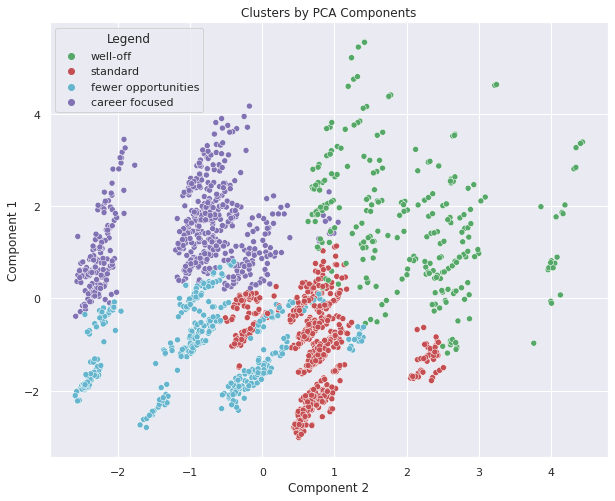

In [ ]:
x_axis=df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue=df_segm_pca_kmeans['Legend'],palette=['g','r','c','m'])
plt.title('Clusters by PCA Components')
plt.show()

**Data Export**

The scaler contains the mean and standard deviation. We need it to preprocess future data in the same way.

In [ ]:
pickle.dump(scaler,open('scaler.pickle','wb'))

We also need the pca and kmeans_pca objects, these will allow us to segment new data points based on the criteria we determined above.

In [ ]:
pickle.dump(pca, open('pca.pickle','wb'))

In [ ]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle','wb'))